# Module 05, 06 & 07 Assignment
## Understanding the ML Problem, Exploratory Data Analysis (EDA) and Basic Preprocessing
**Dataset:** Titanic – Machine Learning from Disaster (Kaggle)

Download the **train.csv** file from Kaggle’s Titanic competition and upload it to this notebook. Rename it to `titanic.csv` or update the file name in the loading cell.
Dataset link: https://www.kaggle.com/datasets/yasserh/titanic-dataset

Total Marks: **100**

### Instructions
- This assignment covers:
  - **Module 05:** Basic ML problem framing (features, target, task type).
  - **Module 06:** Exploratory Data Analysis (EDA).
  - **Module 07:** Basic Preprocessing (handling missing values, encoding, scaling).
- Answer all questions inside this notebook using code and markdown.
- Do not delete the original question texts.
- At the end, the notebook should run from top to bottom without errors.

In [1]:
# ==============================
# Setup
# ==============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

print("Libraries imported.")

Libraries imported.


---
## Part 0: Understanding the ML Problem (Module 05) – 10 marks

### 0.1 Load the Dataset and Inspect (5 marks)
**Tasks:**
1. Load `titanic.csv` into a pandas DataFrame.
2. Show `.head()`, `.info()`, and `.describe()`.
3. Briefly look at the column names and data types.


In [3]:
# 0.1 Load the Dataset and Inspect
# TODO: Change file name if needed.

df = pd.read_csv("Titanic-Dataset.csv")#Download the .csv file from Kaggle

print("Shape of dataset:", df.shape)
display(df.head())

print("\nInfo:")
print(df.info())

print("\nDescribe (numeric columns):")
display(df.describe())

Shape of dataset: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Describe (numeric columns):


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 0.2 Identify Features, Target and Task Type (5 marks)
**Tasks:**
Based on the dataset:
1. Identify the **target variable** for a predictive model.
2. List at least **5 potential feature columns** you could use.
3. State whether this is a **classification** or **regression** problem, and explain **why**.

Write your answers below.


#### **Your answers**
- Target variable: **Survived** - This column indicates whether a passenger survived (1) or not (0) the Titanic disaster.
- Feature columns (at least 5): **Pclass** (passenger class), **Sex** (gender), **Age** (age in years), **SibSp** (number of siblings/spouses aboard), **Parch** (number of parents/children aboard), **Fare** (ticket fare), **Embarked** (port of embarkation).
- Is this classification or regression, and why?: This is a **classification** problem because the target variable (Survived) is categorical with discrete values (0 or 1). We are predicting which class/category a passenger belongs to (survived or not survived), not a continuous numeric value.

---
## Part A: Exploratory Data Analysis (EDA) – 45 marks

### 1. Initial Exploration and Cleaning Decisions (10 marks)
**Tasks:**
1. Show the number of unique values in each column.
2. Identify columns that are clearly **IDs or high-cardinality text** (for example, `PassengerId`, `Name`, `Ticket`).
3. Decide which of these columns you will **drop** for the rest of the analysis and justify in 2–3 sentences.


In [4]:
# 1. Initial Exploration and Cleaning Decisions (Task 1 is given)
print("Unique values per column:")
for col in df.columns:
    print(col, ":", df[col].nunique())

Unique values per column:
PassengerId : 891
Survived : 2
Pclass : 3
Name : 891
Sex : 2
Age : 88
SibSp : 7
Parch : 7
Ticket : 681
Fare : 248
Cabin : 147
Embarked : 3


#### Columns to drop and justification
- Columns dropped: **PassengerId**, **Name**, **Ticket**, **Cabin**
- Justification (2–3 sentences): PassengerId is just a unique identifier with no predictive value for survival. Name and Ticket are high-cardinality text fields that contain unique or nearly unique values for each passenger, making them unsuitable for direct use in most ML models without complex feature engineering. Cabin has too many missing values (approximately 77% missing) and would require significant imputation or could introduce noise into the model.

---
### 2. Univariate Analysis (15 marks)
**Tasks:**
- Plot histograms for numeric features: `Age`, `Fare`, `SibSp`, `Parch`.
- Plot countplots for categorical features: `Sex`, `Pclass`, `Embarked`.
- Write **two to three insights** about the distributions and any obvious patterns.


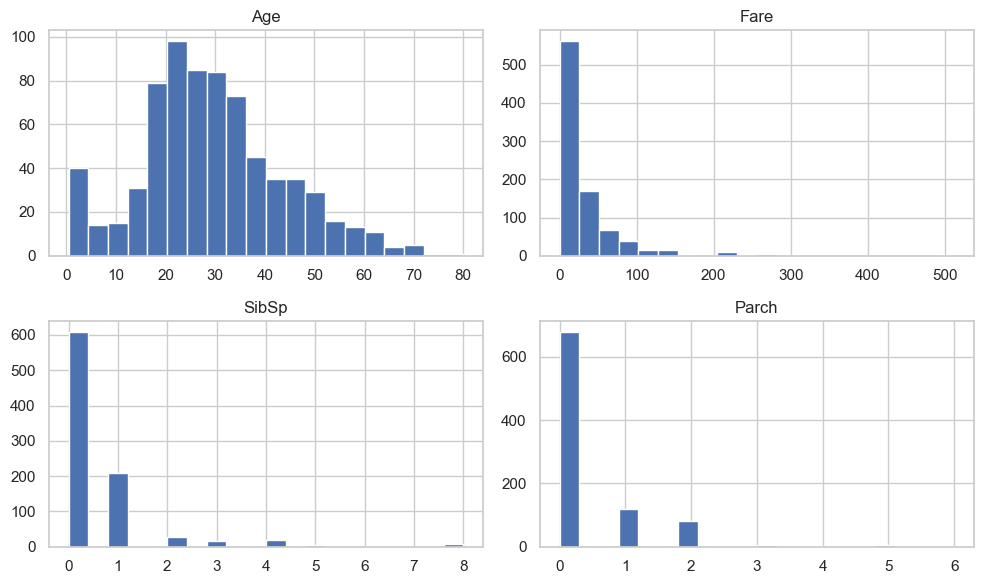

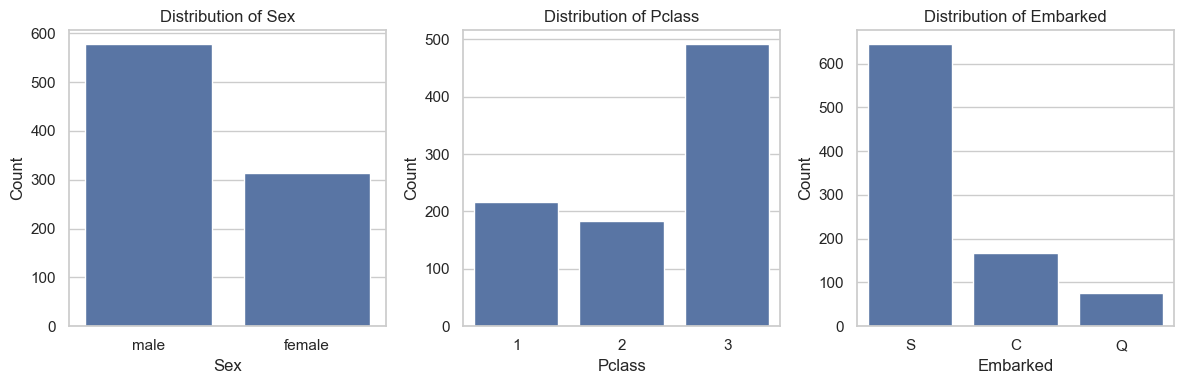

In [5]:
# 2. Univariate Analysis

numeric_cols = ["Age", "Fare", "SibSp", "Parch"]

# Histograms code is written for you
df[numeric_cols].hist(bins=20, figsize=(10, 6))
plt.tight_layout()
plt.show()

# Write Countplots code for key categorical variables [You need to complete]
cat_cols = ["Sex", "Pclass", "Embarked"]

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for i, col in enumerate(cat_cols):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
plt.tight_layout()
plt.show()

#### Write Your insights
- Insight 1: The Age distribution is right-skewed with most passengers between 20-40 years old, and there are missing values that need to be handled. The Fare distribution is heavily right-skewed with most passengers paying lower fares and a few outliers paying very high fares.
- Insight 2: There are more male passengers than female passengers on the Titanic (nearly double). The majority of passengers traveled in 3rd class (Pclass=3), followed by 1st class and then 2nd class.
- Insight 3: Most passengers embarked from Southampton (S), followed by Cherbourg (C) and Queenstown (Q). The SibSp and Parch distributions show that most passengers traveled alone or with very few family members.

---
### 3. Bivariate Analysis with Target (15 marks)
Use `Survived` as the target variable.

**Tasks:**
- Compute and plot a **correlation heatmap** for numeric features, including `Survived`.
- Create a **pairplot** for: `Age`, `Fare`, `SibSp`, `Parch`, and `Survived`.
- Write **two to three insights**, including which variables seem associated with survival.


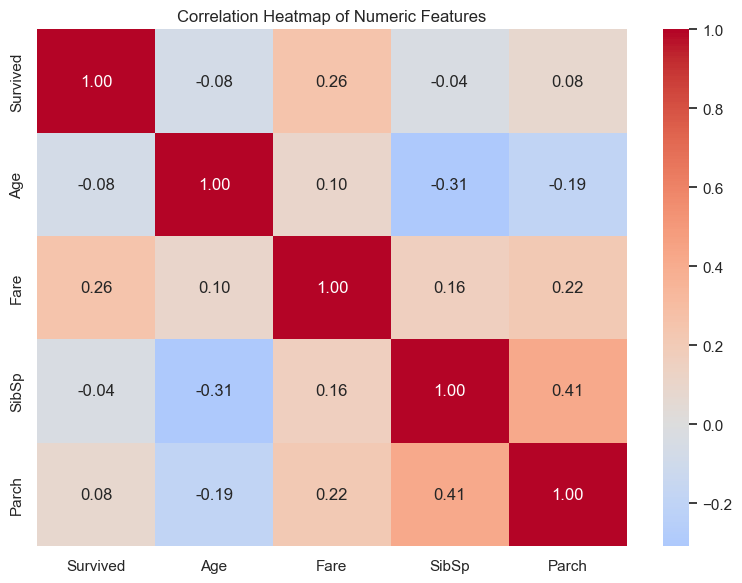

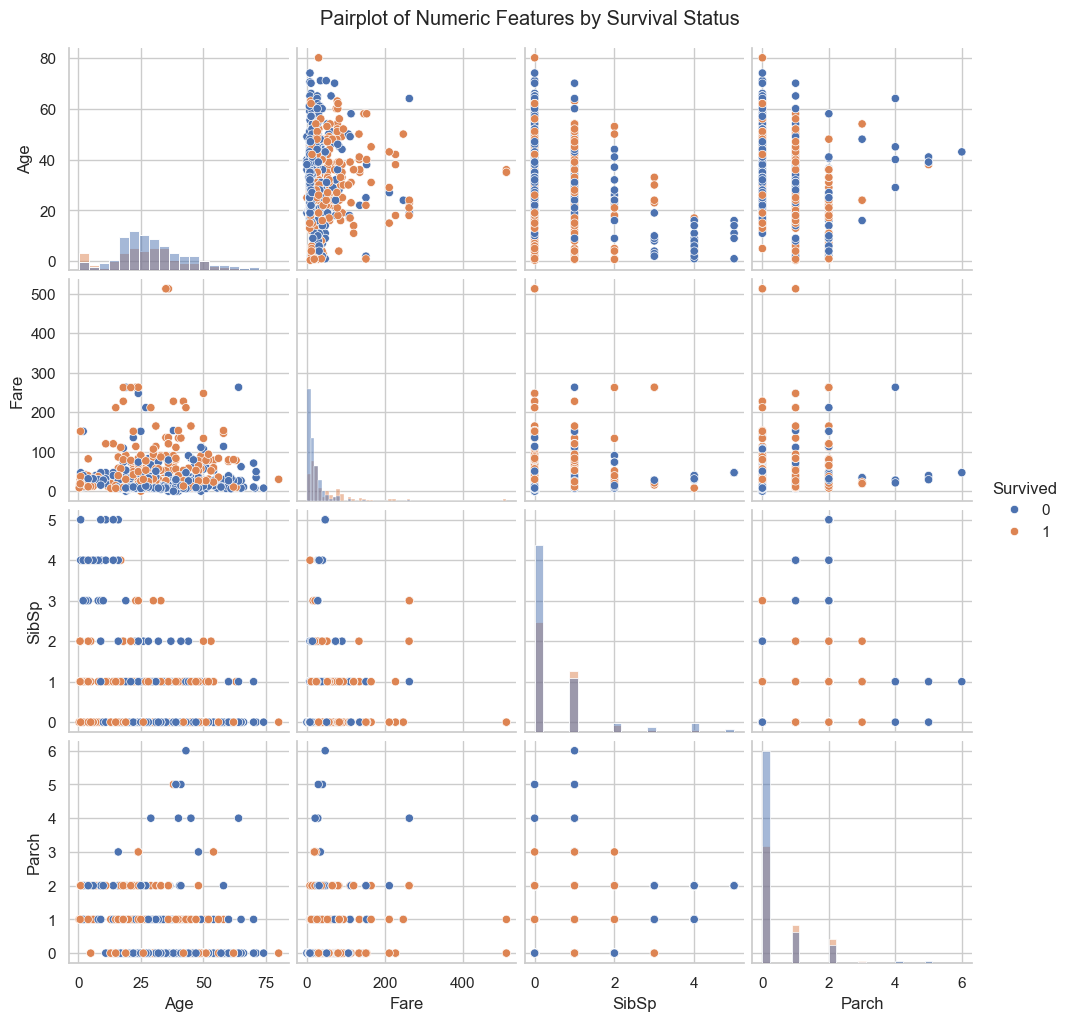

In [6]:
# 3. Bivariate Analysis with Target

num_for_corr = ["Survived", "Age", "Fare", "SibSp", "Parch"]

# Correlation heatmap
plt.figure(figsize=(8, 6))
corr_matrix = df[num_for_corr].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()

# Pairplot
sns.pairplot(df[num_for_corr].dropna(), hue='Survived', diag_kind='hist')
plt.suptitle('Pairplot of Numeric Features by Survival Status', y=1.02)
plt.show()

#### Your insights
- Insight 1: Fare shows a positive correlation with Survival (around 0.26), suggesting that passengers who paid higher fares had better chances of survival. This makes sense as higher fares typically meant better cabin locations and priority access to lifeboats.
- Insight 2: SibSp and Parch have a moderate positive correlation with each other (around 0.41), which is expected since families traveling together would have both siblings/spouses and parents/children aboard.
- Insight 3: Age has a weak negative correlation with Survival, indicating that younger passengers had slightly better survival chances. The pairplot reveals that survivors tend to cluster at higher fare values and shows distinct patterns between survivors and non-survivors.

---
### 4. Categorical vs Target Analysis (5 marks)
**Tasks:**
For each of the following categorical features: `Sex`, `Pclass`, `Embarked`:
- Plot a **bar chart** showing the proportion of passengers who survived in each category.
- Write **two short insights** about which categories have higher or lower survival chances.



Survival proportion by Sex:


Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


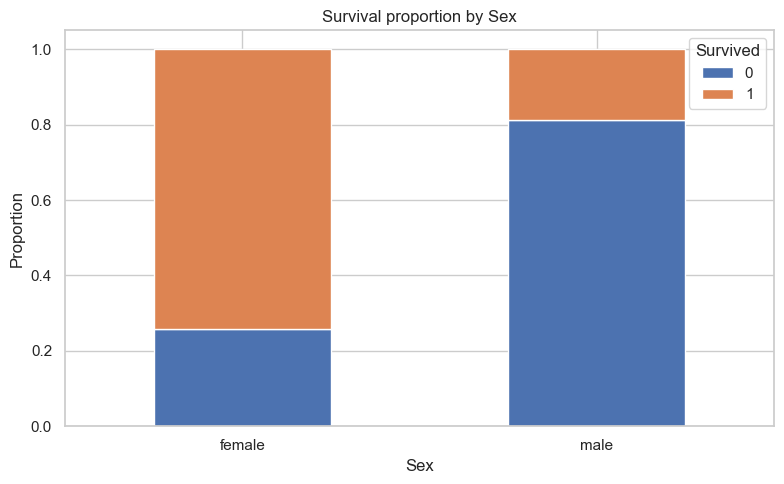


Survival proportion by Pclass:


Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


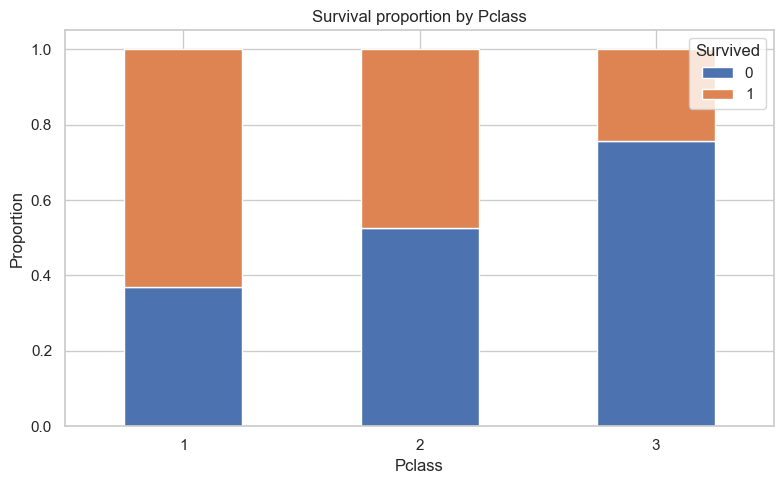


Survival proportion by Embarked:


Survived,0,1
Embarked,,
C,0.446429,0.553571
Q,0.610390,0.389610
S,0.663043,0.336957


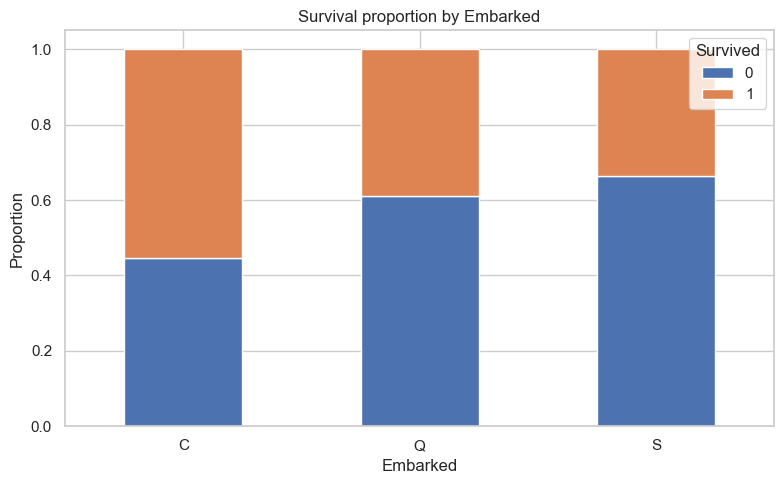

In [7]:
# 4. Categorical vs Target Analysis [Bar chart code is written for you]

cat_target_cols = ["Sex", "Pclass", "Embarked"]

for c in cat_target_cols:
    ct = pd.crosstab(df[c], df["Survived"], normalize="index")
    print(f"\nSurvival proportion by {c}:")
    display(ct)
    ct.plot(kind="bar", stacked=True)
    plt.title(f"Survival proportion by {c}")
    plt.ylabel("Proportion")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

#### Your insights
- Insight 1: Female passengers had a significantly higher survival rate (around 74%) compared to male passengers (around 19%). This reflects the "women and children first" evacuation protocol followed during the Titanic disaster.
- Insight 2: Passenger class strongly influenced survival - 1st class passengers had the highest survival rate (around 63%), followed by 2nd class (around 47%), while 3rd class had the lowest survival rate (around 24%). Passengers who embarked from Cherbourg (C) had higher survival rates than those from Southampton (S) or Queenstown (Q), likely because Cherbourg had more 1st class passengers.

---
## Part B: Basic Data Preprocessing – 45 marks

Focus: **Handling missing values, encoding categorical variables, and scaling numeric features.**

### 5. Handling Missing Values (15 marks)
**Tasks:**
1. Show the count of missing values in each column.
2. Decide how to handle missing values for:
   - `Age` (numeric)
   - `Embarked` (categorical)
   - `Cabin` (many missing values)
3. Implement your chosen strategy in code.
4. Show missing value counts again to confirm.
5. Explain your choices in **3–4 sentences**.


In [8]:
# 5. Handling Missing Values

print("Missing values before:") #[Task 1 is done for you]
print(df.isna().sum())

# Drop Cabin (Complete this code block)
df = df.drop(columns=['Cabin'])

# Fill Age (Complete this code block)
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill Embarked (Complete this code block)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

print("\nMissing values after handling:")
print(df.isna().sum())

Missing values before:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing values after handling:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


#### Explanation of your strategy
- Why you dropped or kept `Cabin`: I dropped the Cabin column because it has approximately 77% missing values (687 out of 891 rows). Imputing such a large proportion of missing data would introduce significant noise and unreliable patterns into the model.
- Why you used median/mean for `Age`: I used the median for Age because it is robust to outliers. Age distribution is slightly skewed, and using mean could be influenced by extreme values. Median provides a better central tendency estimate for skewed distributions.
- Why you used mode or another method for `Embarked`: I used the mode (most frequent value) for Embarked because it is a categorical variable with only 2 missing values. The mode is the most logical choice for categorical data as it fills missing values with the most common category, maintaining the original distribution.

---
### 6. Encoding Categorical Variables (15 marks)
Focus on the following categorical features:
- `Sex`
- `Embarked`
- `Pclass` (treat as categorical)

**Tasks:**
- Use `OneHotEncoder` from sklearn to encode these features.
- Keep `Survived` and the main numeric features (`Age`, `Fare`, `SibSp`, `Parch`).
- Show the shape and head of the encoded DataFrame.


In [9]:
# 6. Encoding Categorical Variables

df_enc = df.copy()

# Select features for encoding and keep important numeric ones
cat_features = ["Sex", "Embarked", "Pclass"]
numeric_features = ["Age", "Fare", "SibSp", "Parch"]
target_col = "Survived"

# One hot encode categorical variables [You need to do]
# Convert Pclass to string for consistent encoding
df_enc['Pclass'] = df_enc['Pclass'].astype(str)

encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_array = encoder.fit_transform(df_enc[cat_features])
encoded_columns = encoder.get_feature_names_out(cat_features)
encoded_df = pd.DataFrame(encoded_array, columns=encoded_columns, index=df_enc.index)

# Build final encoded DataFrame
df_model = pd.concat([
    df_enc[[target_col] + numeric_features],
    encoded_df
], axis=1)

print("Shape after encoding:", df_model.shape)
display(df_model.head())

Shape after encoding: (891, 10)


,Survived,Age,Fare,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,22.0,7.2500,1,0,1.0,0.0,1.0,0.0,1.0
1,1,38.0,71.2833,1,0,0.0,0.0,0.0,0.0,0.0
2,1,26.0,7.9250,0,0,0.0,0.0,1.0,0.0,1.0
3,1,35.0,53.1000,1,0,0.0,0.0,1.0,0.0,0.0
4,0,35.0,8.0500,0,0,1.0,0.0,1.0,0.0,1.0


---
### 7. Scaling Numeric Features (15 marks)
**Tasks:**
- Use `StandardScaler` on the numeric features: `Age`, `Fare`, `SibSp`, `Parch`.
- Plot boxplots of these features **before** and **after** scaling.
- Write **two sentences** explaining how scaling changes the numeric values and why it is useful before training some ML models.


In [ ]:
# 7. Scaling Numeric Features

score_cols = ["Age", "Fare", "SibSp", "Parch"]

# Boxplot before scaling
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_model[score_cols])
plt.title("Numeric features before scaling")
plt.tight_layout()
plt.show()

# Apply StandardScaler [You need to do]
scaler = StandardScaler()
df_scaled = df_model.copy()
df_scaled[score_cols] = scaler.fit_transform(df_model[score_cols])

# Boxplot after scaling
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_scaled[score_cols])
plt.title("Numeric features after StandardScaler")
plt.tight_layout()
plt.show()

#### Your observations on scaling
- Sentence 1: StandardScaler transforms each numeric feature to have a mean of 0 and a standard deviation of 1, which brings all features to a comparable scale. Before scaling, Fare had values ranging from 0 to over 500, while SibSp and Parch ranged from 0 to about 8.
- Sentence 2: Scaling is essential for ML algorithms that are sensitive to feature magnitudes, such as gradient descent-based methods (logistic regression, neural networks) and distance-based algorithms (KNN, SVM). Without scaling, features with larger ranges would dominate the model's learning process.

---
### 8. Simple Feature Quality Check (5 marks)
**Tasks:**
- Show `.info()` of the final processed DataFrame (`df_scaled`).
- Confirm there are no missing values.
- Confirm that all remaining features are numeric and suitable for most ML models.
- Write **one short concluding remark** about dataset readiness.


In [ ]:
# 8. Simple Feature Quality Check
print(df_scaled.info())

print("\nTotal missing values in final DataFrame:", df_scaled.isna().sum().sum())

#### Final remark on dataset readiness
- Your remark: The dataset is now fully preprocessed and ready for machine learning model training. All missing values have been handled, categorical variables have been one-hot encoded into numeric format, and numeric features have been standardized. The final DataFrame contains only numeric columns with no missing values, making it suitable for most ML classification algorithms.